In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from koreanize_matplotlib import koreanize
koreanize()

In [2]:
df=pd.read_csv('./data/어종별.csv')

In [59]:
df.reset_index(inplace=True)

In [63]:
df['산지'].value_counts().sort_values(ascending=False)

산지
제주도    8544
안흥      847
여수      752
군산      589
통영      508
       ... 
필리핀       1
축산        1
연평도       1
구룡포       1
베트남       1
Name: count, Length: 72, dtype: int64

In [4]:
! pip install prophet

In [5]:
from prophet import Prophet

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16877 entries, 0 to 16876
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   어종      16877 non-null  object 
 1   산지      16877 non-null  object 
 2   규격      16877 non-null  object 
 3   포장      16877 non-null  object 
 4   수량      16877 non-null  object 
 5   중량      16877 non-null  float64
 6   낙찰고가    16877 non-null  object 
 7   낙찰저가    16877 non-null  object 
 8   평균가     16877 non-null  object 
 9   year    16877 non-null  int64  
 10  month   16877 non-null  int64  
 11  date    16877 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.5+ MB


In [7]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,year,month,date
0,(선)명태,일본,중,S/P,5,10.0,"60,000","60,000","60,000",2021,1,2021-01-01
1,(냉)명태,러시아,6통,PAN(펜),"2,117",21.5,"33,600","24,500","25,700",2021,1,2021-01-01
2,(냉)명태,러시아,4통,PAN(펜),246,21.5,"47,200","46,700","46,900",2021,1,2021-01-01
3,(냉)명태,러시아,9통,PAN(펜),220,21.5,"30,500","30,500","30,500",2021,1,2021-01-01
4,(냉)명태,러시아,3통,PAN(펜),331,21.5,"51,900","41,000","42,000",2021,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
16872,(활)찰넙치,태안,2미,kg,5.6,1.0,"20,000","20,000","20,000",2024,12,2024-12-01
16873,(활)찰넙치,제주도,1미,kg,265.1,1.0,"28,500","25,000","27,500",2024,12,2024-12-01
16874,(활)찰넙치,제주도,7미,kg,108.5,1.0,"28,000","22,000","25,200",2024,12,2024-12-01
16875,(활)찰넙치,제주도,5미,kg,38.4,1.0,"18,000","12,000","14,400",2024,12,2024-12-01


In [8]:
df.isna().sum()

어종       0
산지       0
규격       0
포장       0
수량       0
중량       0
낙찰고가     0
낙찰저가     0
평균가      0
year     0
month    0
date     0
dtype: int64

In [9]:
df = pd.read_csv('./data/어종별.csv', index_col=0, parse_dates=['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16877 entries, (선)명태 to (활)찰넙치
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   산지      16877 non-null  object        
 1   규격      16877 non-null  object        
 2   포장      16877 non-null  object        
 3   수량      16877 non-null  object        
 4   중량      16877 non-null  float64       
 5   낙찰고가    16877 non-null  object        
 6   낙찰저가    16877 non-null  object        
 7   평균가     16877 non-null  object        
 8   year    16877 non-null  int64         
 9   month   16877 non-null  int64         
 10  date    16877 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 1.5+ MB


In [13]:
df.sort_values(by='date')

,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,year,month,date
어종,,,,,,,,,,,
(선)명태,일본,중,S/P,5,10.0,"60,000","60,000","60,000",2021,1,2021-01-01
(냉)고등어,제주도,20미,CT/(BT),10,10.0,"10,000","10,000","10,000",2021,1,2021-01-01
(냉)고등어,제주도,15미,S/P,6,15.0,"23,000","23,000","23,000",2021,1,2021-01-01
(냉)고등어,제주도,15미,CT/(BT),16,10.0,"22,000","22,000","22,000",2021,1,2021-01-01
(냉)고등어,제주도,23미,S/P,1,15.0,"30,000","30,000","30,000",2021,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
(선)은갈치,제주도,27미,S/P,4,6.0,"35,000","25,000","30,000",2024,12,2024-12-01
(선)은갈치,제주도,1미,S/P,2,2.2,"65,000","50,000","57,500",2024,12,2024-12-01
(선)은갈치,제주도,10미,S/P,"1,113",5.0,"160,000","55,000","122,500",2024,12,2024-12-01


In [16]:
df['평균가'] = df['평균가'].str.replace(',','').astype(int)

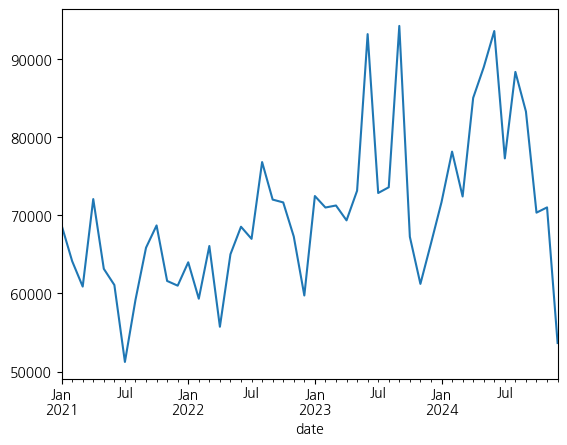

In [17]:
df.groupby('date')['평균가'].mean().plot()
plt.show() # 메모리상태 제거

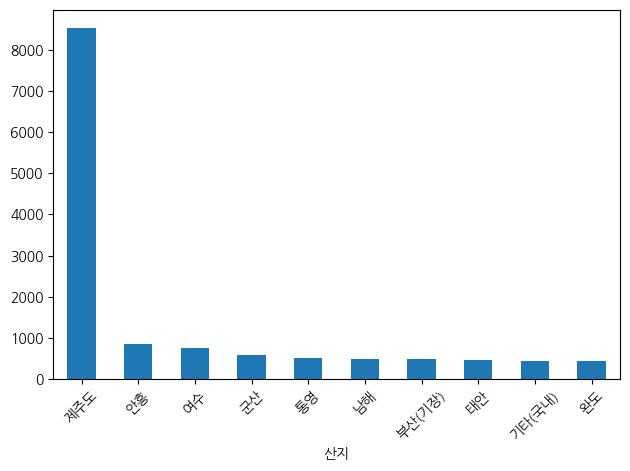

In [22]:
df['산지'].value_counts().head(10).plot(kind='bar')
plt.tight_layout()
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.show()

<Axes: xlabel='year'>

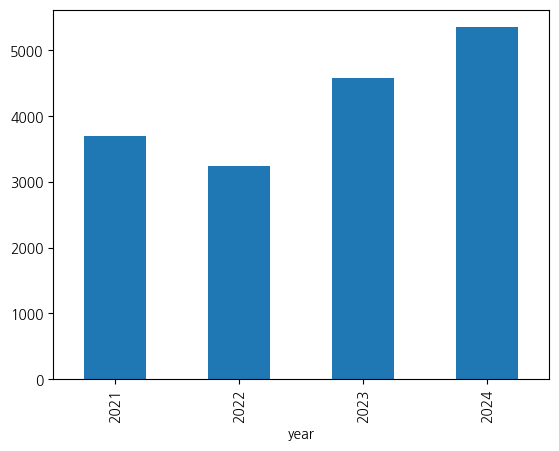

In [23]:
df['year'].value_counts().sort_index().plot(kind='bar')

In [28]:
df_time = df[['date','평균가']]

In [32]:
df_time=df_time.reset_index().drop('어종', axis=1)

In [40]:
df_time=df_time.groupby('date')['평균가'].mean().to_frame().reset_index()

In [41]:
df_time.columns = ['ds','y']

In [42]:
df_time

,ds,y
0,2021-01-01,68717.562724
1,2021-02-01,64135.748792
2,2021-03-01,60877.254902
3,2021-04-01,72070.545455
4,2021-05-01,63147.936508
5,2021-06-01,61078.823529
6,2021-07-01,51237.704918
7,2021-08-01,59169.350649
8,2021-09-01,65849.728261
9,2021-10-01,68699.182561


In [43]:
model = Prophet()

In [44]:
model.fit(df_time)

16:36:17 - cmdstanpy - INFO - Chain [1] start processing
16:36:18 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = model.make_future_dataframe(periods=24, freq='M')

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [49]:
forecast = model.predict(future)

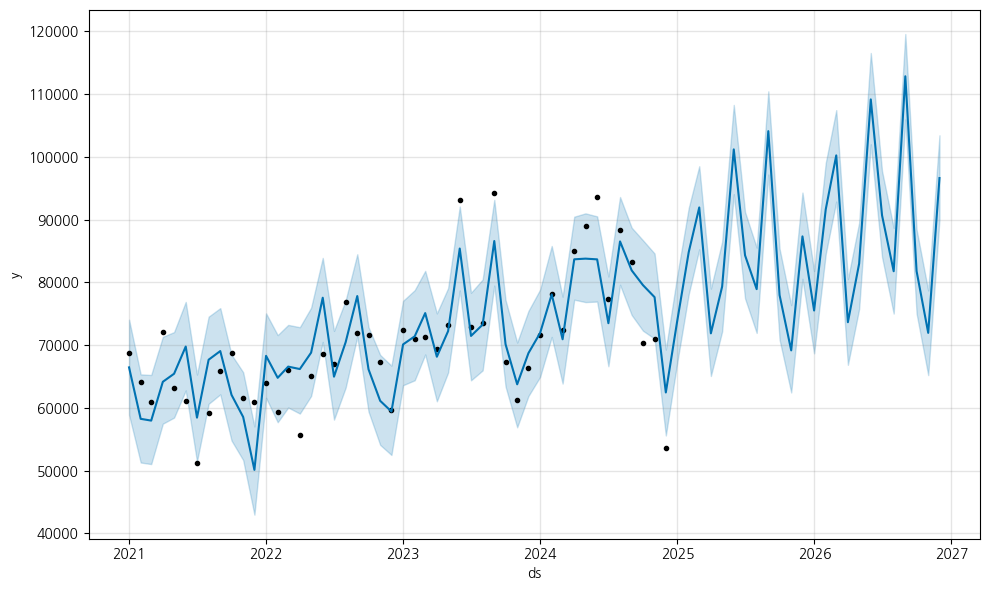

In [50]:
model.plot(forecast)
plt.show()

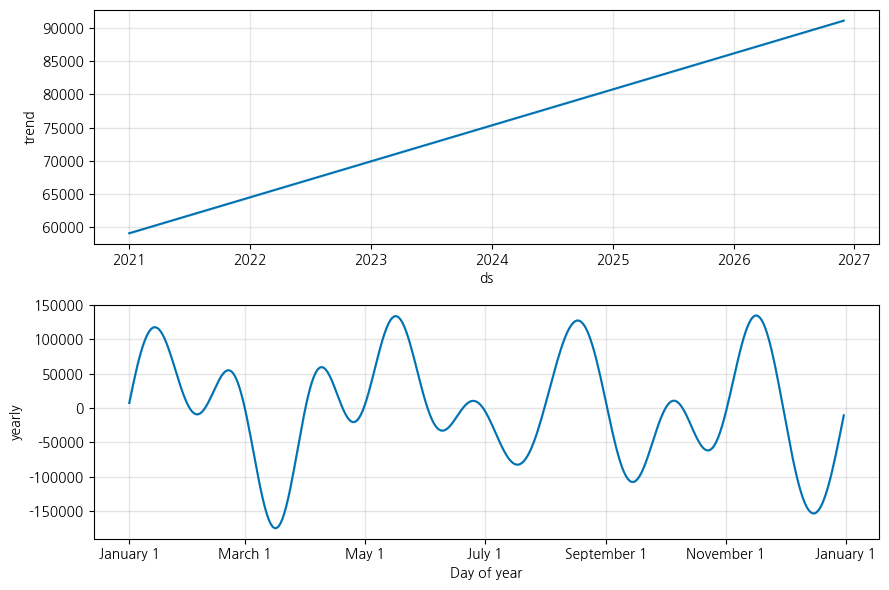

In [51]:
model.plot_components(forecast)
plt.show()

In [67]:
df_zezo =df[df['산지']=='제주도']

In [69]:
df_zezo.rename(columns={'date':'ds', '평균가':'y'}, inplace=True)

/var/folders/p6/kff249cn76scx1tv7jch4vym0000gn/T/ipykernel_32902/12579230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zezo.rename(columns={'date':'ds', '평균가':'y'}, inplace=True)


In [96]:
df_zezo=df_zezo.groupby('ds')['y'].mean().to_frame().reset_index()

In [97]:
model = Prophet()

In [98]:
model.fit(df_zezo)

17:42:05 - cmdstanpy - INFO - Chain [1] start processing
17:42:06 - cmdstanpy - INFO - Chain [1] done processing


In [99]:
future = model.make_future_dataframe(periods=24, freq='M')

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [100]:
forecast = model.predict(future)

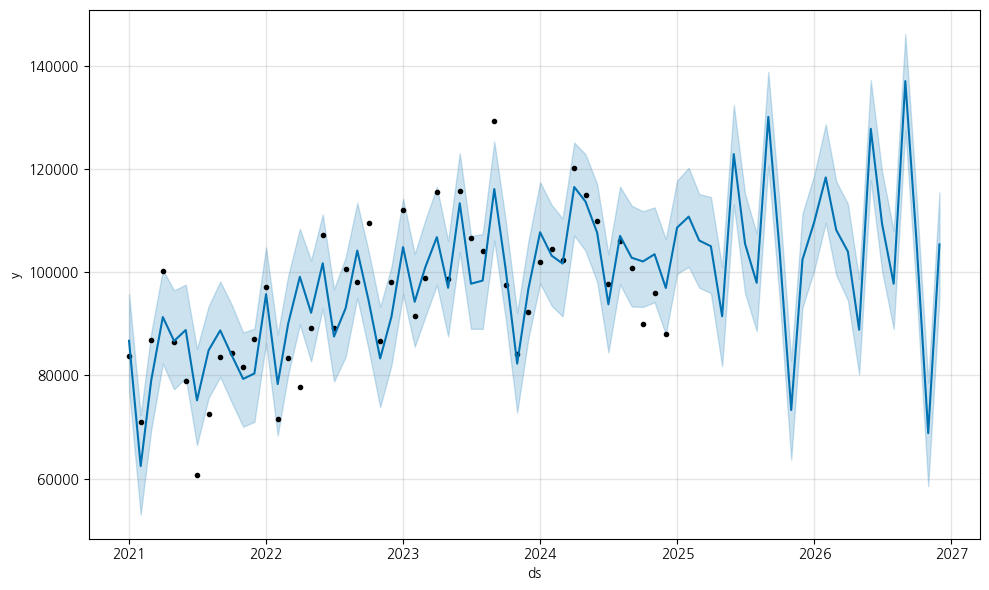

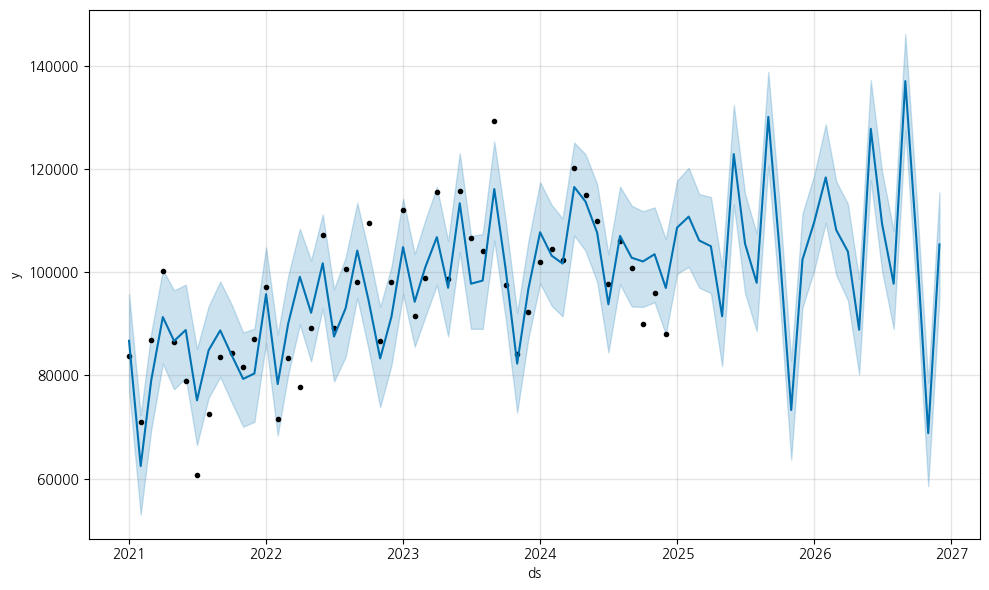

In [103]:
model.plot(forecast)
# 제주도의 날짜별 평균가 예측